# 📊 Informasi Dataset Abalone (UCI ML Repository)
## Dataset
Dataset diperoleh dari https://archive.ics.uci.edu/dataset/1/abalone
## 🎯 Tujuan Penelitian
Dataset ini digunakan untuk **memprediksi umur abalone** berdasarkan pengukuran fisik yang lebih mudah dilakukan.  
Umur asli diperoleh dengan **mengiris cangkang**, mewarnainya, lalu menghitung jumlah **cincin** menggunakan mikroskop — metode ini memakan waktu dan membosankan.

Sebagai gantinya, kita mencoba memprediksi umur hanya dari data numerik.

---

## 🔍 Deskripsi Fitur dan Target

| Fitur               | Tipe        | Deskripsi                                                                 |
|---------------------|-------------|---------------------------------------------------------------------------|
| `Sex`               | Kategorikal | Jenis kelamin abalone: `M` = Male, `F` = Female, `I` = Infant (belum dewasa) |
| `Length`            | Numerik     | Panjang tubuh tanpa cangkang (dalam cm)                                   |
| `Diameter`          | Numerik     | Diameter tubuh tegak lurus terhadap panjang (dalam cm)                    |
| `Height`            | Numerik     | Tinggi tubuh dengan cangkang (dalam cm)                                   |
| `Whole weight`      | Numerik     | Berat total abalone (dalam gram)                                          |
| `Shucked weight`    | Numerik     | Berat daging abalone setelah dibuka (gram)                                |
| `Viscera weight`    | Numerik     | Berat organ dalam (termasuk usus, gram)                                   |
| `Shell weight`      | Numerik     | Berat cangkang setelah dikeringkan (gram)                                 |
| `Rings` *(Target)*  | Integer     | Jumlah cincin pada cangkang. Digunakan untuk menghitung umur:  
📌 **Umur = Rings + 1.5** (dalam tahun) |

---

## 📝 Catatan dari Sumber Dataset
- Dataset ini **tidak memiliki missing value** (sudah dibersihkan).
- Untuk keperluan Artificial Neural Network (ANN), nilai numerik kadang dibagi 200 (normalisasi khusus ANN).
- Faktor lingkungan seperti **cuaca dan lokasi** juga mempengaruhi umur abalone, namun **tidak tersedia** dalam dataset ini.

---

## 🧠 Tujuan Analisis
- Prediksi usia abalone (regresi)
- Atau klasifikasi umur ke dalam kategori (anak, remaja, dewasa, tua)


In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Informasi Atribut

| Nama Variabel    | Tipe Data            | Deskripsi                                                     |
| ---------------- | -------------------- | ------------------------------------------------------------- |
| `Sex`            | Kategorikal (string) | Jenis kelamin abalone: `M` (Male), `F` (Female), `I` (Infant) |
| `Length`         | Numerik (float)      | Panjang abalone (dalam mm), tanpa cangkang                    |
| `Diameter`       | Numerik (float)      | Diameter abalone (dalam mm), tanpa cangkang                   |
| `Height`         | Numerik (float)      | Tinggi abalone (dalam mm), dengan jaringan lunak ditekan      |
| `Whole weight`   | Numerik (float)      | Berat keseluruhan abalone (dalam gram)                        |
| `Shucked weight` | Numerik (float)      | Berat daging abalone setelah dikupas (dalam gram)             |
| `Viscera weight` | Numerik (float)      | Berat organ dalam (usus, dll) abalone (dalam gram)            |
| `Shell weight`   | Numerik (float)      | Berat cangkang kering abalone setelah dioven (dalam gram)     |
| `Rings`          | Integer (target)     | Jumlah cincin pertumbuhan (umur = `Rings + 1.5`)              |


## Eksplorasi Data

### Jumlah Baris Dan Kolom

In [45]:
print("\n--- Ukuran Dataset ---")
print(f"Jumlah data (baris): {df.shape[0]}")
print(f"Jumlah fitur (kolom): {df.shape[1]}")



--- Ukuran Dataset ---
Jumlah data (baris): 4177
Jumlah fitur (kolom): 11


### Menampilkan data

In [22]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Ambil dataset
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Gabungkan fitur dan target jadi satu DataFrame
df = X.copy()
df['Rings'] = y

# Tampilkan info singkat

# Tampilkan statistik ringkas dengan tabulate
print("\n--- Statistik Deskriptif ---")
print(tabulate(df.describe().reset_index(), headers='keys', tablefmt='grid'))

# Tampilkan distribusi kategori 'Sex' dengan tabulate
print("\n--- Distribusi Jenis Kelamin (Sex) ---")
print(tabulate(df['Sex'].value_counts().reset_index().rename(columns={
    'index': 'Sex', 'Sex': 'Jumlah'
}), headers='keys', tablefmt='grid'))



--- Statistik Deskriptif ---
+----+---------+-------------+--------------+--------------+----------------+------------------+------------------+----------------+------------+
|    | index   |      Length |     Diameter |       Height |   Whole_weight |   Shucked_weight |   Viscera_weight |   Shell_weight |      Rings |
+====+=========+=============+==============+==============+================+==================+==================+================+============+
|  0 | count   | 4177        | 4177         | 4177         |    4177        |      4177        |      4177        |    4177        | 4177       |
+----+---------+-------------+--------------+--------------+----------------+------------------+------------------+----------------+------------+
|  1 | mean    |    0.523992 |    0.407881  |    0.139516  |       0.828742 |         0.359367 |         0.180594 |       0.238831 |    9.93368 |
+----+---------+-------------+--------------+--------------+----------------+-----------------

## Cek Missing Value

In [25]:
from tabulate import tabulate

missing = df.isnull().sum().reset_index()
missing.columns = ['Kolom', 'Jumlah Missing']
print(tabulate(missing, headers='keys', tablefmt='grid'))


+----+----------------+------------------+
|    | Kolom          |   Jumlah Missing |
+====+================+==================+
|  0 | Sex            |                0 |
+----+----------------+------------------+
|  1 | Length         |                0 |
+----+----------------+------------------+
|  2 | Diameter       |                0 |
+----+----------------+------------------+
|  3 | Height         |                0 |
+----+----------------+------------------+
|  4 | Whole_weight   |                0 |
+----+----------------+------------------+
|  5 | Shucked_weight |                0 |
+----+----------------+------------------+
|  6 | Viscera_weight |                0 |
+----+----------------+------------------+
|  7 | Shell_weight   |                0 |
+----+----------------+------------------+
|  8 | Rings          |                0 |
+----+----------------+------------------+


## Cek Outlier dengan zscore

In [28]:
from scipy.stats import zscore

# Hitung Z-score untuk semua kolom numerik
z_scores = df[numerik_cols].apply(zscore)

# Tandai outlier: nilai dengan Z > 3 atau Z < -3
outliers = (z_scores.abs() > 3).sum()

# Tampilkan dalam tabel
outlier_table = outliers.reset_index()
outlier_table.columns = ['Kolom', 'Jumlah Outlier']
print(tabulate(outlier_table, headers='keys', tablefmt='grid'))


+----+----------------+------------------+
|    | Kolom          |   Jumlah Outlier |
+====+================+==================+
|  0 | Length         |               15 |
+----+----------------+------------------+
|  1 | Diameter       |               13 |
+----+----------------+------------------+
|  2 | Height         |                5 |
+----+----------------+------------------+
|  3 | Whole_weight   |               19 |
+----+----------------+------------------+
|  4 | Shucked_weight |               37 |
+----+----------------+------------------+
|  5 | Viscera_weight |               22 |
+----+----------------+------------------+
|  6 | Shell_weight   |               27 |
+----+----------------+------------------+


## Visualisasi Data

In [40]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tema seaborn
sns.set_theme(style="whitegrid")

# Ambil dataset
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Gabungkan ke satu DataFrame
df = X.copy()
df['Rings'] = y

# (lanjutkan dengan visualisasi batang...)

# Set style
plt.style.use('whitegrid')
sns.set_palette("pastel")

# 1. Grafik Batang: Distribusi Umur (Rings)
plt.figure(figsize=(12, 4))
rings_count = df['Rings'].value_counts().sort_index()
plt.bar(rings_count.index, rings_count.values)
plt.xlabel('Jumlah Cincin (Rings)')
plt.ylabel('Jumlah Abalone')
plt.title('Distribusi Umur Abalone (Rings)')
plt.xticks(rings_count.index)
plt.tight_layout()
plt.show()

# 2. Grafik Batang: Distribusi Jenis Kelamin (Sex)
plt.figure(figsize=(6, 4))
sex_count = df['Sex'].value_counts()
plt.bar(sex_count.index, sex_count.values, color=['lightblue', 'salmon', 'lightgreen'])
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Abalone')
plt.title('Distribusi Jenis Kelamin Abalone')
plt.tight_layout()
plt.show()

# 3. Grafik Batang: Rata-rata Berat Berdasarkan Jenis Kelamin
plt.figure(figsize=(8, 4))
mean_weights = df.groupby('Sex')[['Whole weight', 'Shucked weight', 'Shell weight']].mean()
mean_weights.plot(kind='bar')
plt.title('Rata-rata Berat Berdasarkan Jenis Kelamin')
plt.ylabel('Berat (gram)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


OSError: 'whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Langkah Langkah Pre-Procesing Data

### Encoding untuk fitur Kategorikal

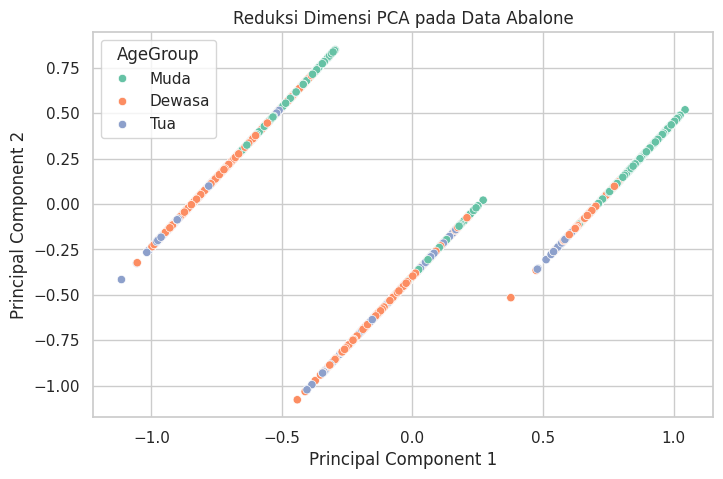

In [41]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Gabungkan ke satu DataFrame
df = X.copy()
df['Rings'] = y

# ========================
# 1. One-Hot Encoding
# ========================
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
# hasil: kolom 'Sex_F' dan 'Sex_M' (karena 'I' jadi dasar)

# ========================
# 2. Binning Umur
# ========================
# Kelompokkan umur berdasarkan 'Rings'
df['AgeGroup'] = pd.cut(df['Rings'], bins=[0, 8, 11, 30], labels=['Muda', 'Dewasa', 'Tua'])

# ========================
# 3. Normalisasi Min-Max
# ========================
fitur_numerik = df.drop(columns=['Rings', 'AgeGroup'])  # semua fitur kecuali target
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(fitur_numerik), columns=fitur_numerik.columns)

# Gabungkan hasil normalisasi dan target
df_scaled['AgeGroup'] = df['AgeGroup'].values
df_scaled['Rings'] = df['Rings'].values

# ========================
# 4. Reduksi Dimensi (PCA)
# ========================
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(columns=['Rings', 'AgeGroup']))
df_scaled['PC1'] = pca_result[:, 0]
df_scaled['PC2'] = pca_result[:, 1]

# Visualisasi PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_scaled, x='PC1', y='PC2', hue='AgeGroup', palette='Set2')
plt.title('Reduksi Dimensi PCA pada Data Abalone')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Lakukan Klasifikasi

Akurasi Decision Tree : 60.05 %
Akurasi Naive Bayes   : 56.54 %

Klasifikasi Decision Tree:

              precision    recall  f1-score   support

      Dewasa       0.58      0.57      0.57       540
        Muda       0.70      0.68      0.69       437
         Tua       0.50      0.53      0.51       277

    accuracy                           0.60      1254
   macro avg       0.59      0.59      0.59      1254
weighted avg       0.60      0.60      0.60      1254


Klasifikasi Naive Bayes:

              precision    recall  f1-score   support

      Dewasa       0.54      0.46      0.50       540
        Muda       0.68      0.79      0.73       437
         Tua       0.40      0.42      0.41       277

    accuracy                           0.57      1254
   macro avg       0.54      0.56      0.55      1254
weighted avg       0.56      0.57      0.56      1254



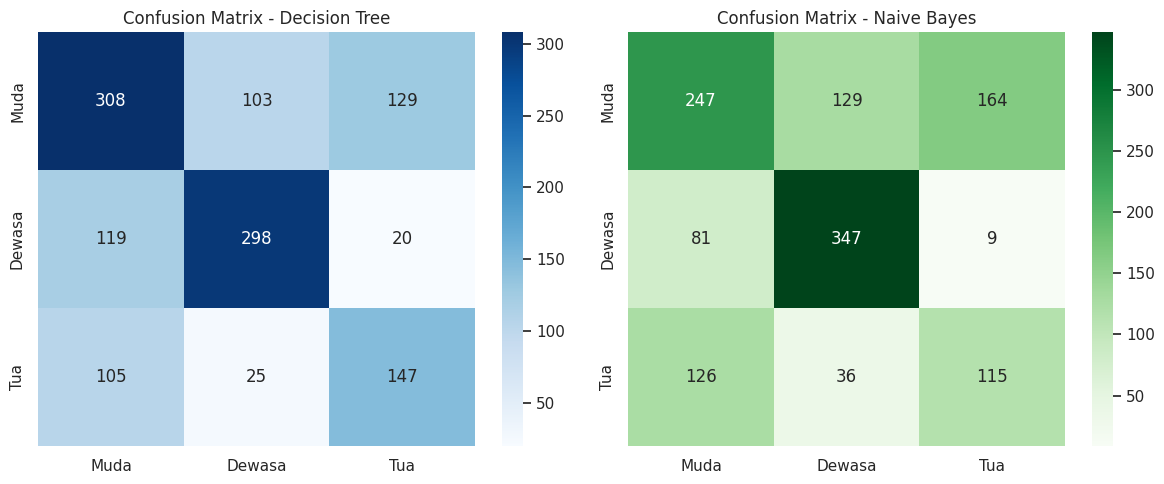

In [43]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil dan siapkan data
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Gabung dan encode
df = X.copy()
df['Rings'] = y
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Binning target menjadi 3 kategori umur
df['AgeGroup'] = pd.cut(df['Rings'], bins=[0, 8, 11, 30], labels=['Muda', 'Dewasa', 'Tua'])

# Normalisasi fitur
fitur = df.drop(columns=['Rings', 'AgeGroup'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(fitur)

# Target klasifikasi
y_class = df['AgeGroup']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

# ============================
# 1. Decision Tree Classifier
# ============================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# ============================
# 2. Naive Bayes Classifier
# ============================
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# ============================
# Hasil Evaluasi
# ============================
print("Akurasi Decision Tree :", round(acc_dt * 100, 2), "%")
print("Akurasi Naive Bayes   :", round(acc_nb * 100, 2), "%")

print("\nKlasifikasi Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))

print("\nKlasifikasi Naive Bayes:\n")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix untuk visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Muda', 'Dewasa', 'Tua'], yticklabels=['Muda', 'Dewasa', 'Tua'])
plt.title("Confusion Matrix - Decision Tree")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Muda', 'Dewasa', 'Tua'], yticklabels=['Muda', 'Dewasa', 'Tua'])
plt.title("Confusion Matrix - Naive Bayes")

plt.tight_layout()
plt.show()
